In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
main_dir = '/glade/derecho/scratch/molina/MCSMIP/mloutput/'

In [43]:
season = 'Winter'
model_select = 'OBSv7'

In [44]:
main_dir+season+'/MCSMIP_'+season+'_'+model_select+'.nc'

'/glade/derecho/scratch/molina/MCSMIP/mloutput/Winter/MCSMIP_Winter_OBSv7.nc'

In [45]:
ds = xr.open_dataset(main_dir+season+'/MCSMIP_'+season+'_'+model_select+'.nc')

In [46]:
ds

<xarray.Dataset>
Dimensions:        (time: 1008, lat: 1200, lon: 3600)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-20 ... 2020-03-01T23:00:00
  * lon            (lon) float64 -179.9 -179.8 -179.8 ... 179.8 179.8 179.9
  * lat            (lat) float64 -59.95 -59.85 -59.75 ... 59.75 59.85 59.95
Data variables:
    Tb             (time, lat, lon) float32 ...
    precipitation  (time, lat, lon) float32 ...
    olr            (time, lat, lon) float32 ...
    mcs_prob       (time, lat, lon) float32 ...
Attributes:
    Title:       Winter OBSv7 OLR & precipitation
    phase:       Winter
    source:      OBSv7
    Created_on:  Thu Mar 21 10:24:03 2024

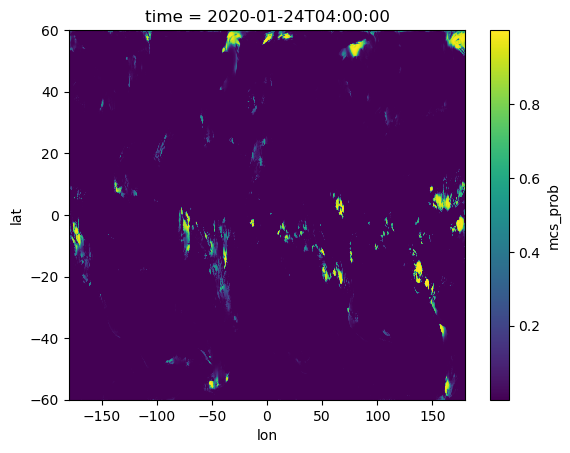

In [47]:
ds.mcs_prob.isel(time=100).plot()

In [48]:
cntnans = ds.Tb.isnull().sum('lat').sum('lon')

In [49]:
cntnans

<xarray.DataArray 'Tb' (time: 1008)>
array([5555, 5516, 5344, ..., 4827, 4724, 4903])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 ... 2020-03-01T23:00:00

In [50]:
np.argmax(cntnans.values)

897

In [51]:
np.argpartition(cntnans.values, -5)[-5:]

array([369, 895, 896, 893, 897])

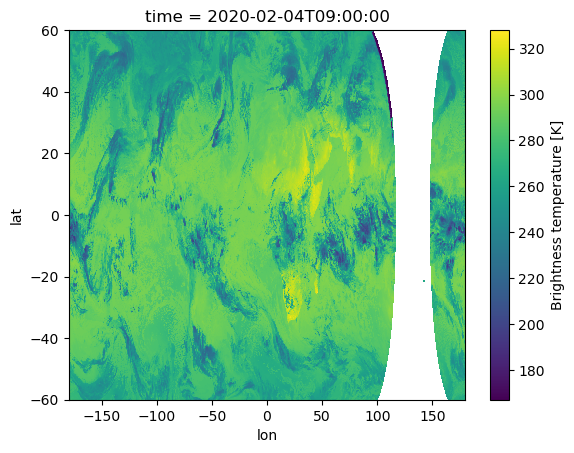

In [52]:
ds.Tb[369].plot()

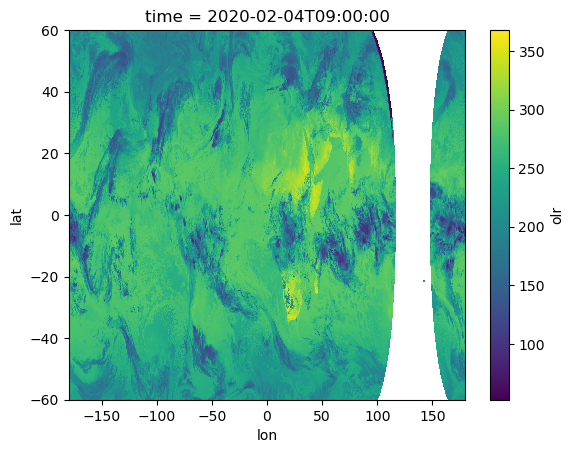

In [53]:
ds.olr[369].plot()

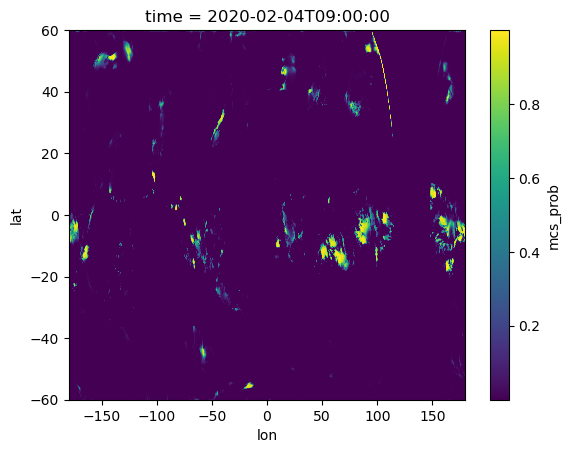

In [54]:
ds.mcs_prob[369].plot()

### Idealized inference

In [2]:
mcsdir = '/glade/derecho/scratch/molina/MCSMIP/idealized_cases/'
file1 = 'MCS-test-1_3-merging_1-splitting.nc'
file2 = 'MCS-test-3_3-merging_1-splitting_longer-isolation_single-overshoot.nc'
file3 = 'MCS-test-2_3-merging_1-splitting_longer-isolation.nc'
file4 = 'MCS-test-4_asynchronous-development.nc'

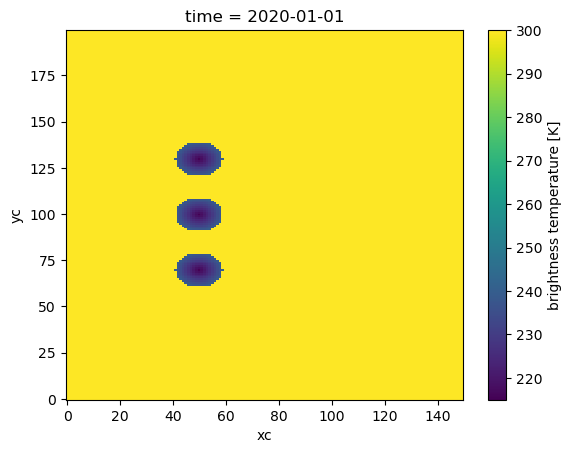

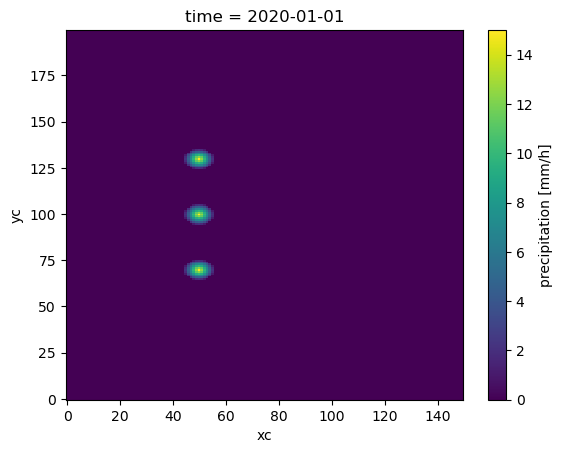

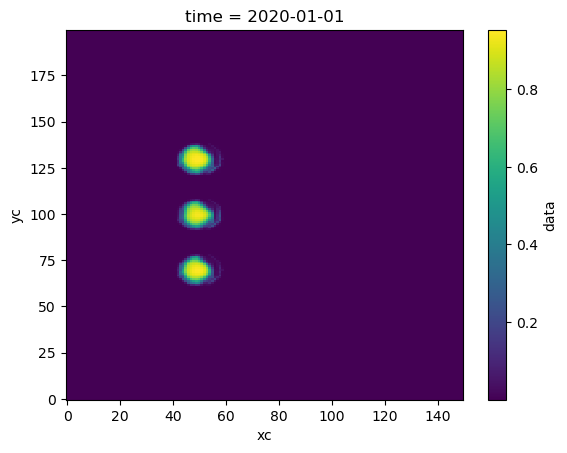

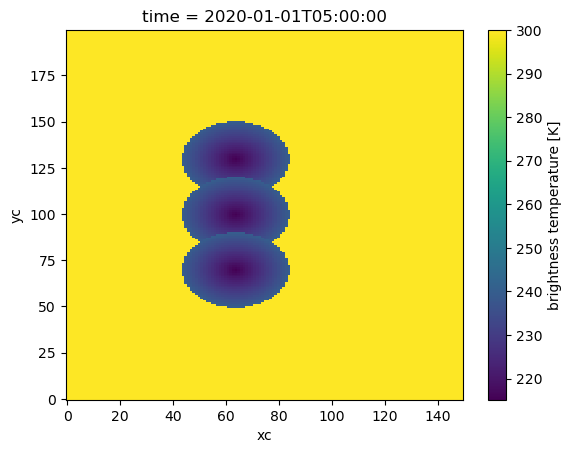

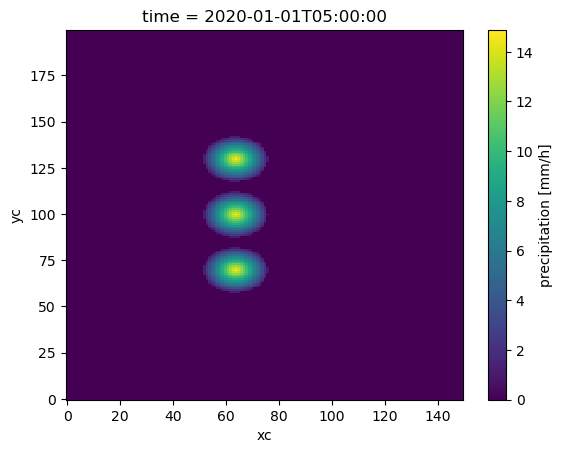

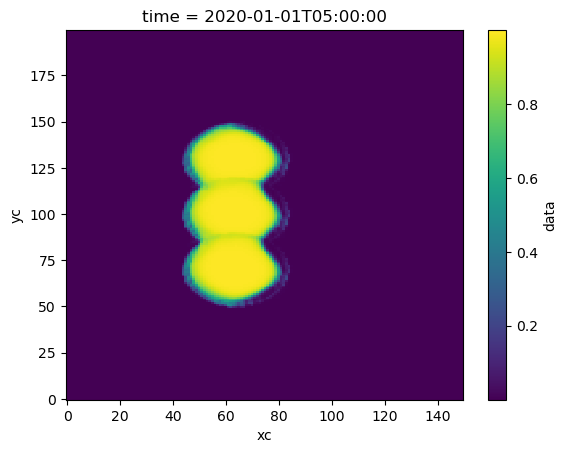

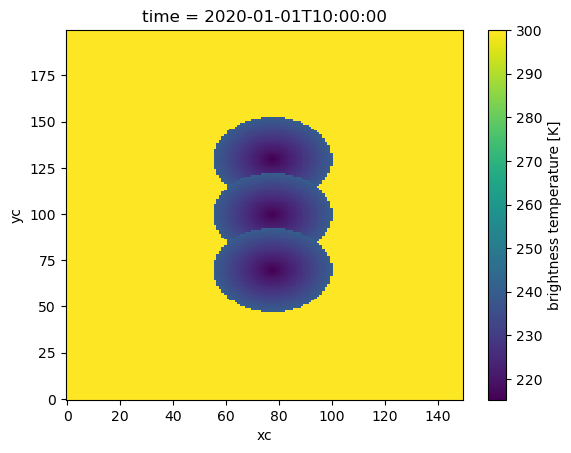

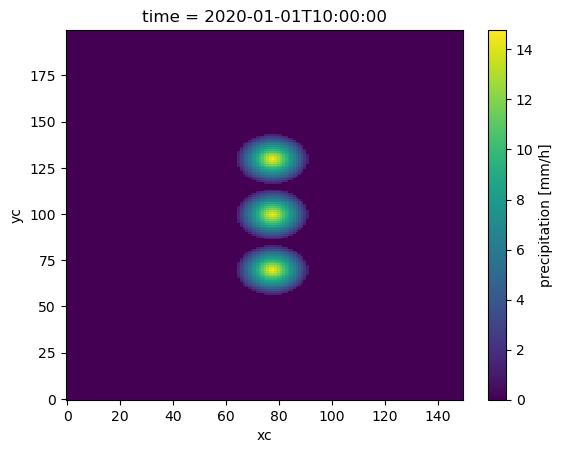

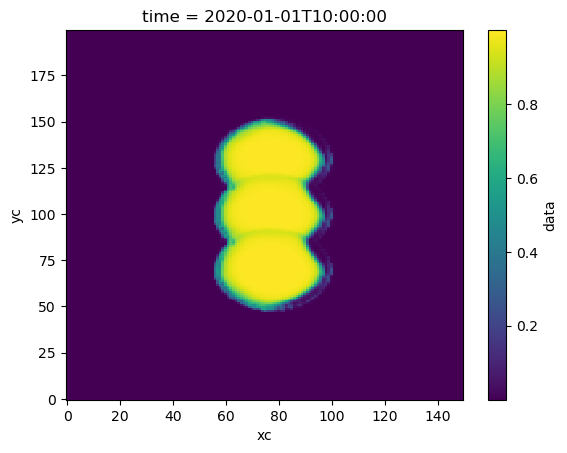

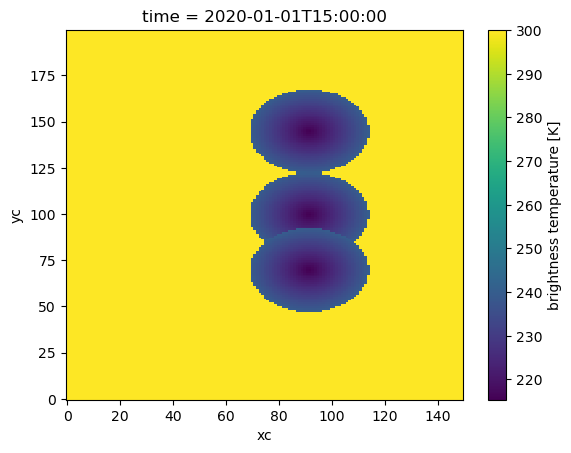

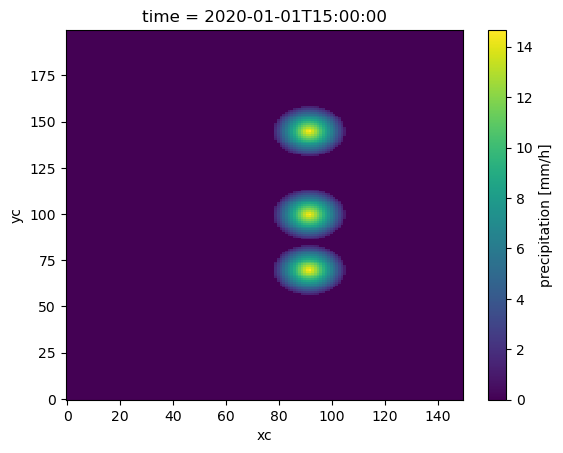

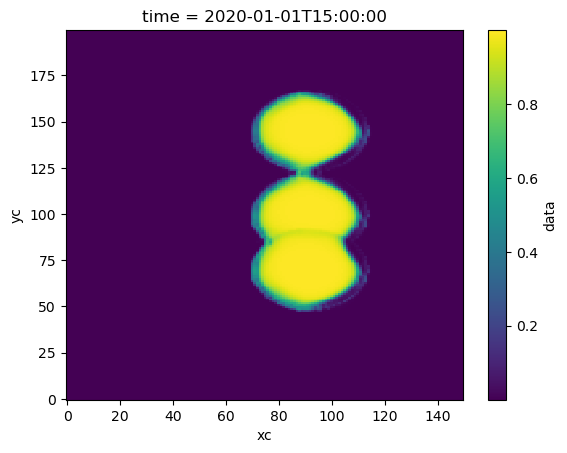

<xarray.Dataset>
Dimensions:  (time: 19, class: 2, yc: 200, xc: 150)
Coordinates:
    lon      (yc, xc) float32 dask.array<chunksize=(200, 150), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(200, 150), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-01T18:00:00
Dimensions without coordinates: class, yc, xc
Data variables:
    data     (time, class, yc, xc) float32 dask.array<chunksize=(1, 2, 200, 150), meta=np.ndarray>
Attributes:
    author:       Maria J. Molina
    email:        mjmolina@umd.edu
    description:  MCSs detected using deep learning model.

In [3]:
ds_orig = xr.open_dataset(mcsdir+file1)

ds = xr.open_mfdataset(
    '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/Idealized_*.nc')

for i in np.arange(0, ds.time.shape[0], 5):
    ds_orig['Tb'].isel(time=i).plot(); plt.show()
    ds_orig['PR'].isel(time=i).plot(); plt.show()
    ds['data'][:,1,:,:].isel(time=i).plot(); plt.show()

ds.assign_attrs(
    author="Maria J. Molina",
    email="mjmolina@umd.edu",
    description="MCSs detected using deep learning model."
)#.to_netcdf(
 #   '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/MCS-test-1_3-merging_1-splitting_DLmodel.nc'
#)

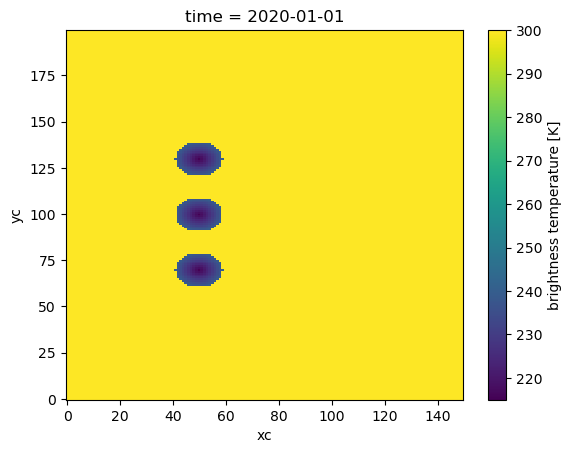

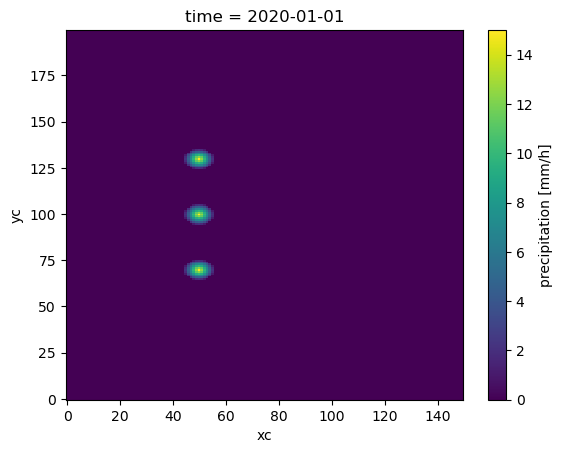

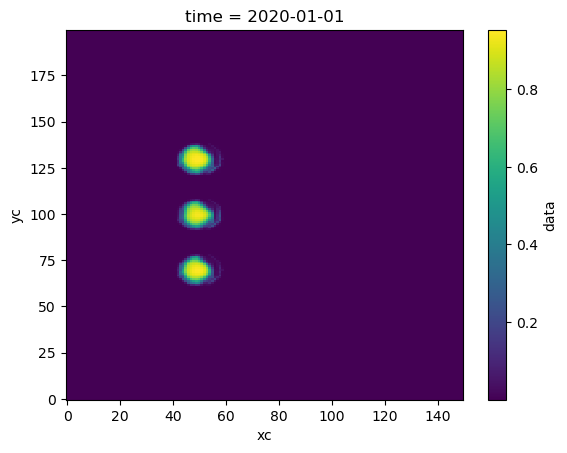

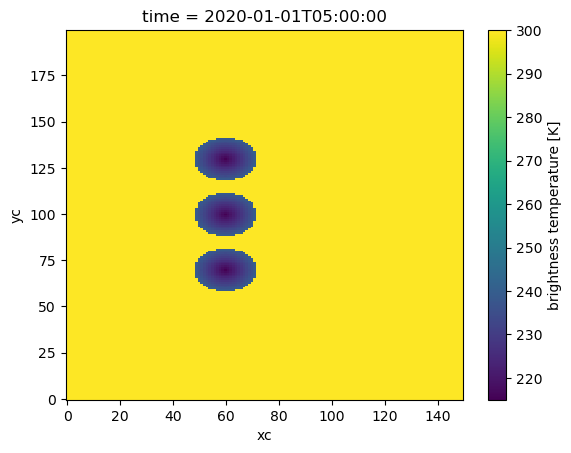

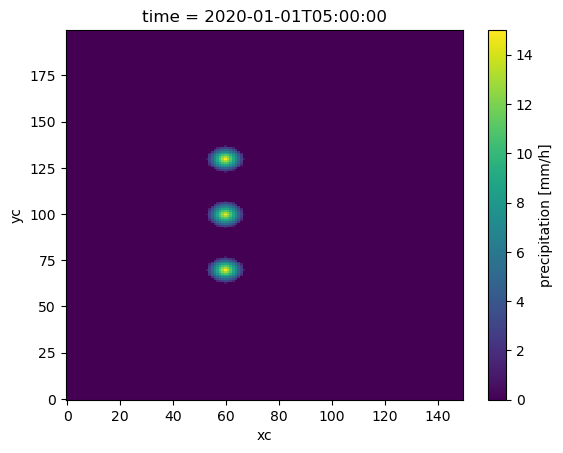

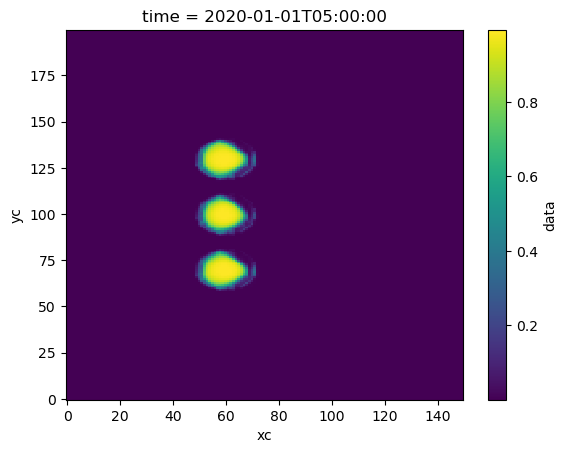

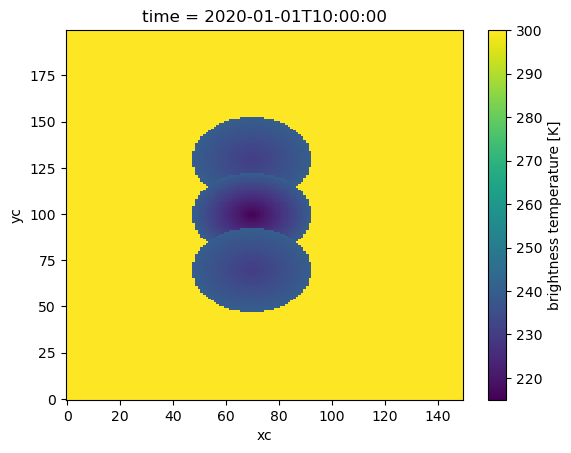

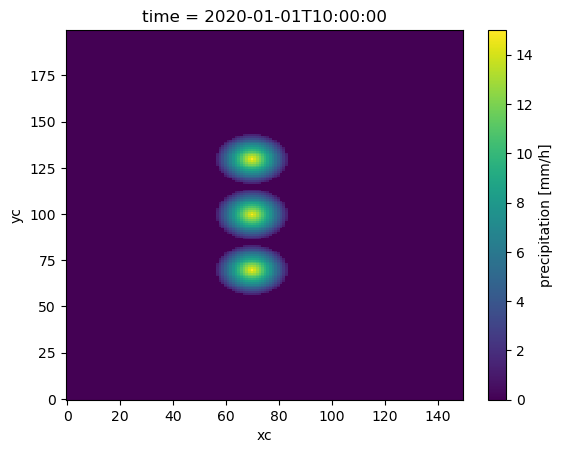

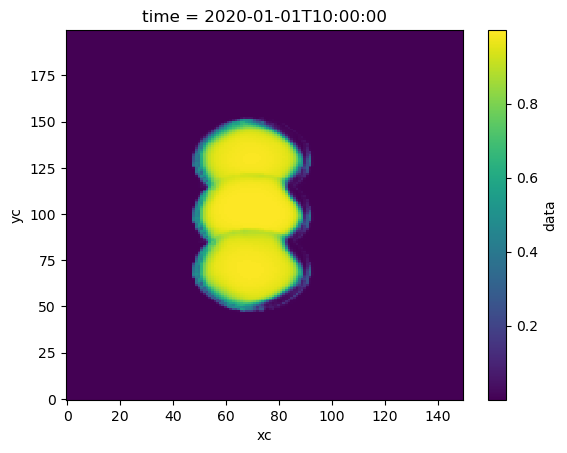

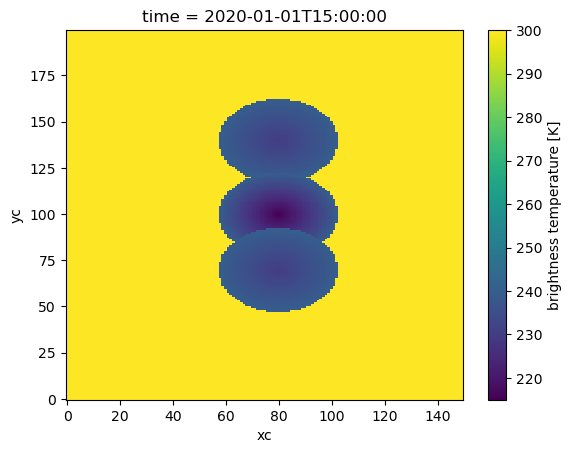

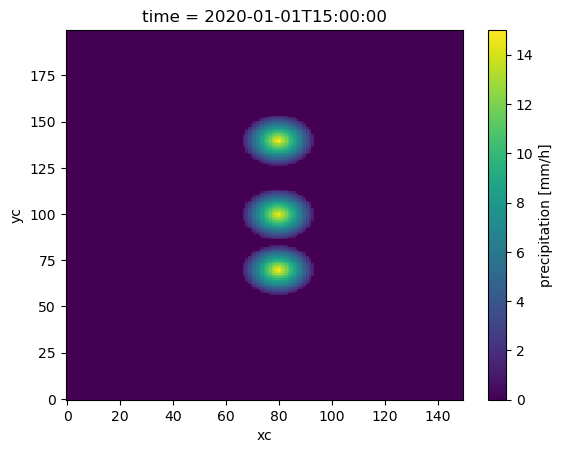

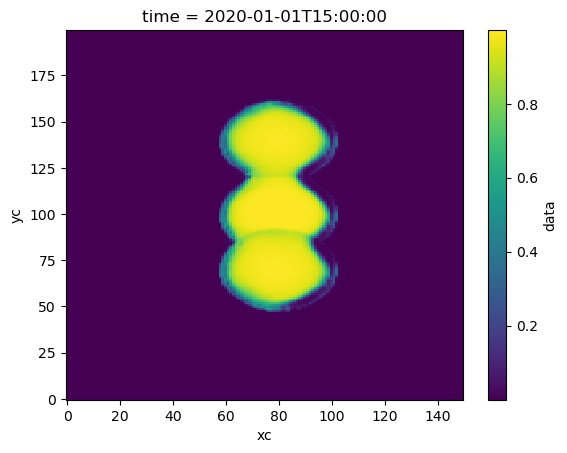

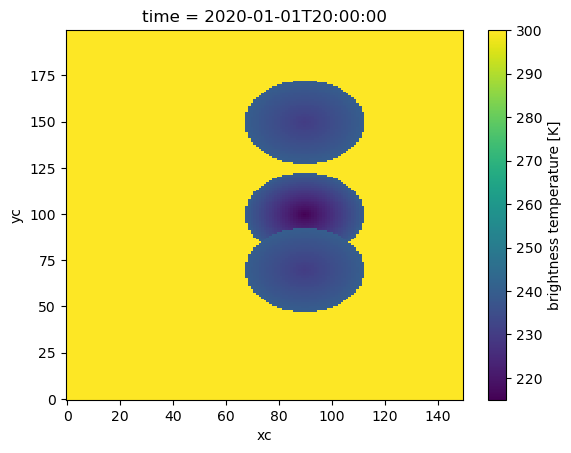

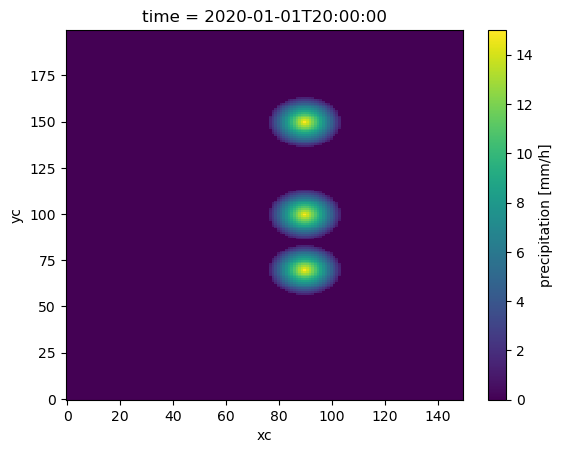

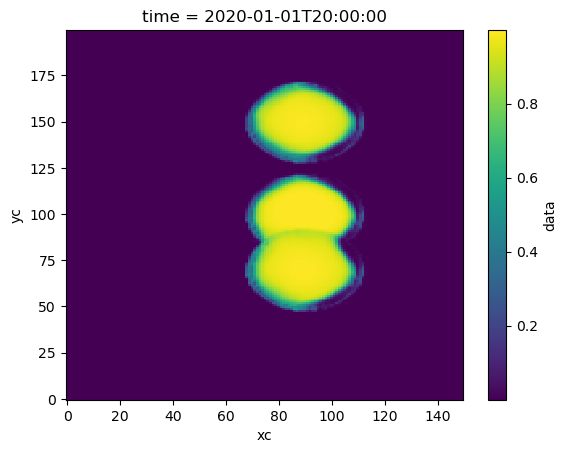

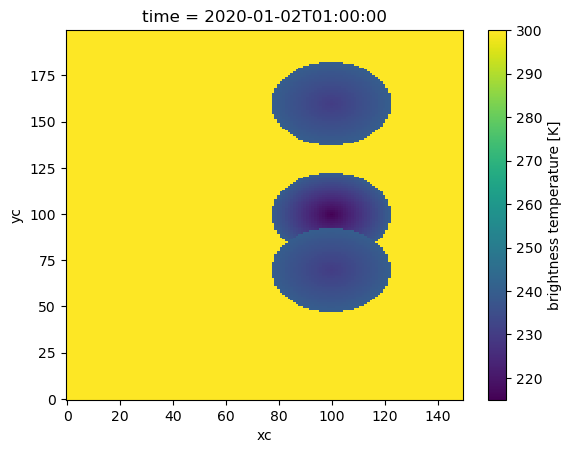

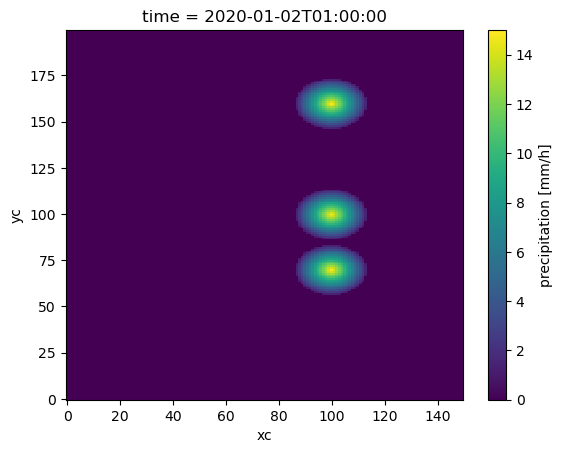

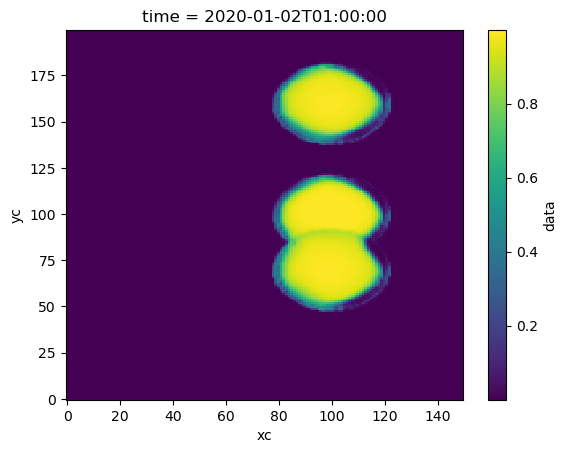

In [62]:
ds_orig = xr.open_dataset(mcsdir+file2)

ds = xr.open_mfdataset(
    '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/Idealized2_*.nc')

for i in np.arange(0, ds.time.shape[0], 5):
    ds_orig['Tb'].isel(time=i).plot(); plt.show()
    ds_orig['PR'].isel(time=i).plot(); plt.show()
    ds['data'][:,1,:,:].isel(time=i).plot(); plt.show()

ds.assign_attrs(
    author="Maria J. Molina",
    email="mjmolina@umd.edu",
    description="MCSs detected using deep learning model."
).to_netcdf(
    '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/MCS-test-3_3-merging_1-splitting_longer-isolation_single-overshoot_DLmodel.nc'
)

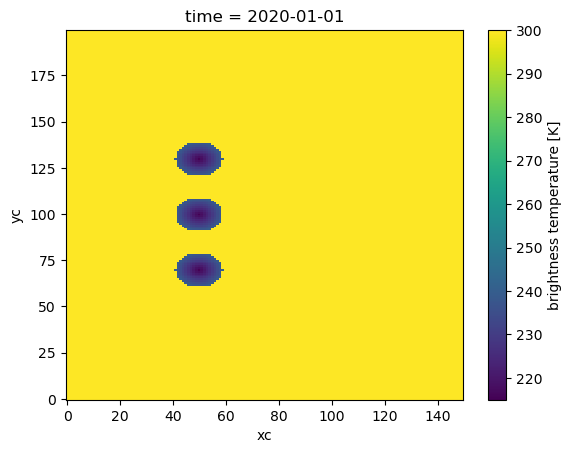

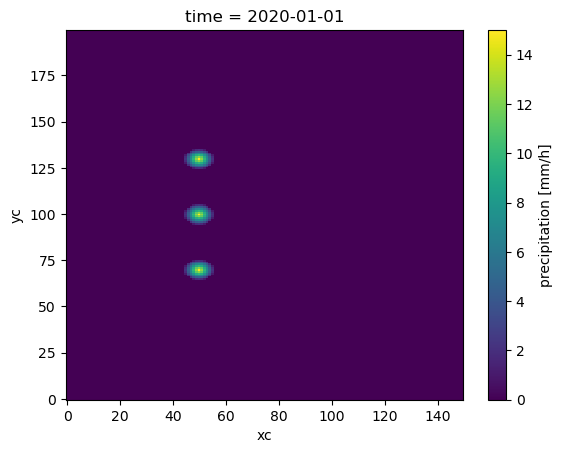

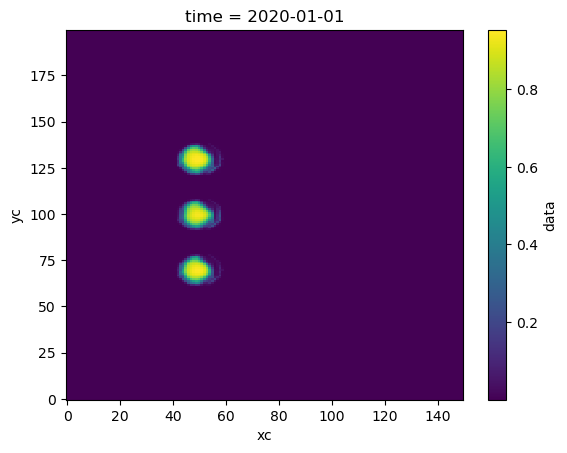

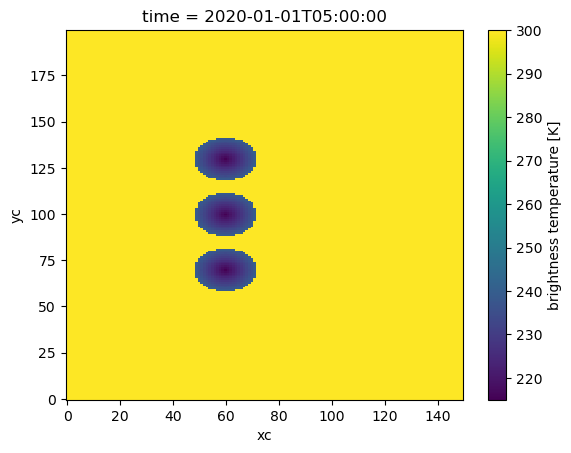

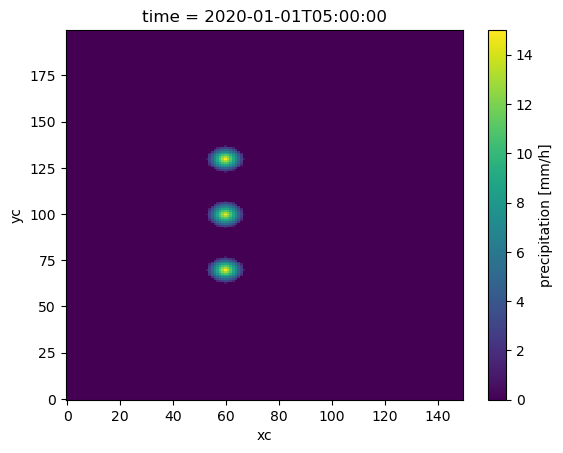

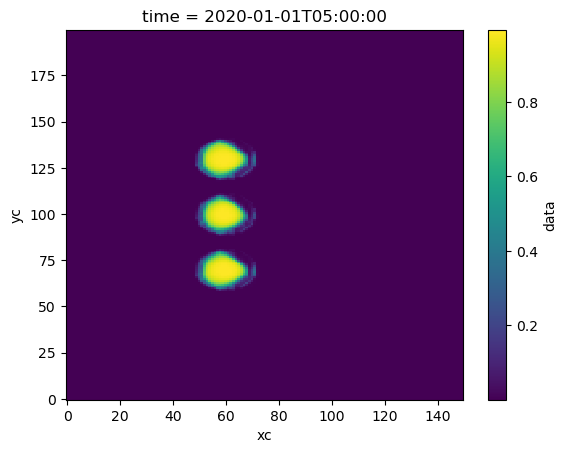

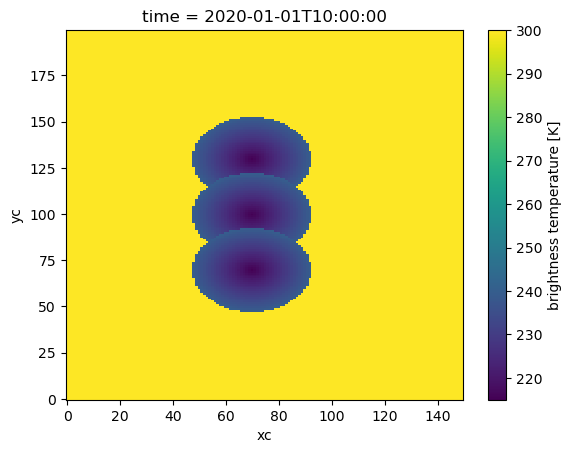

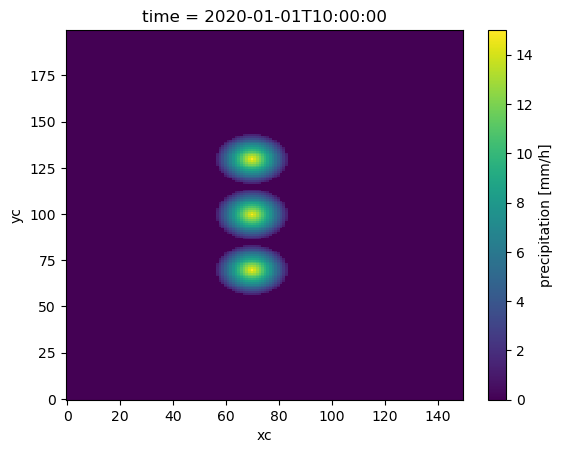

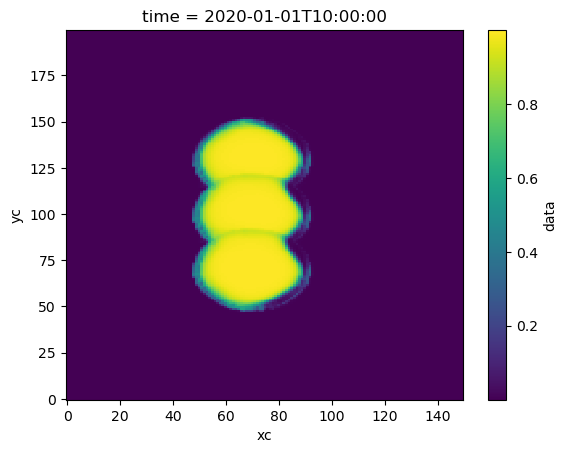

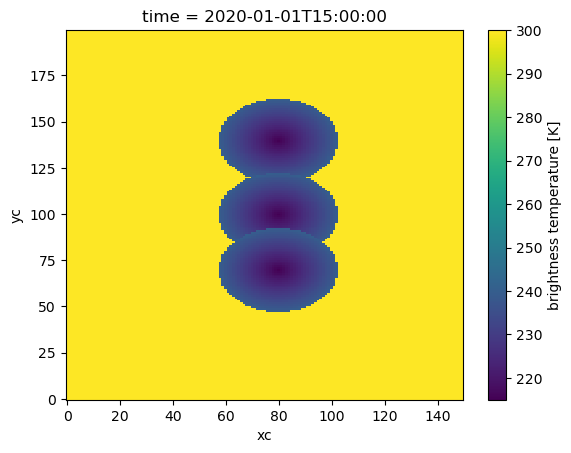

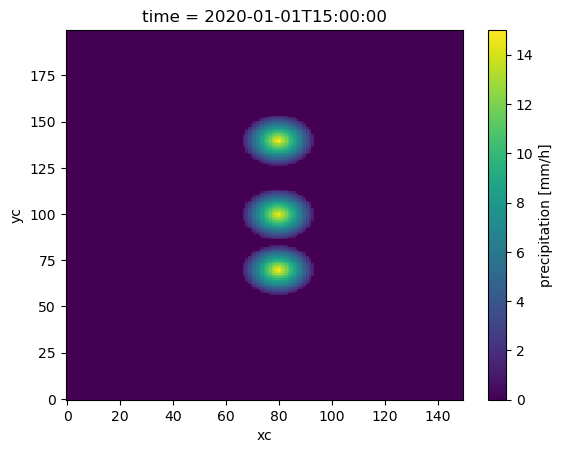

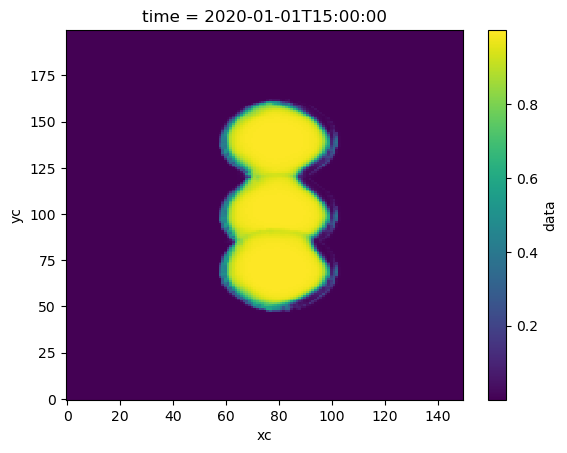

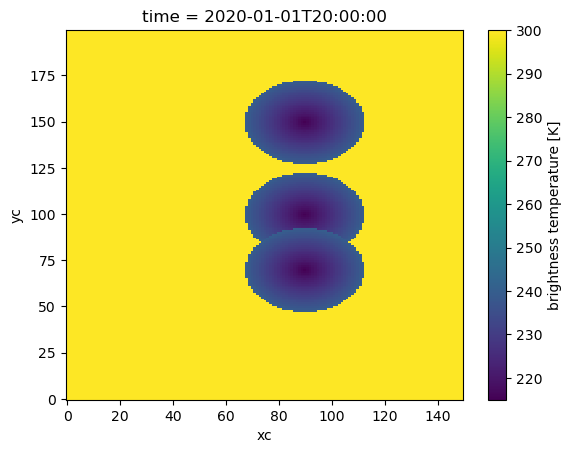

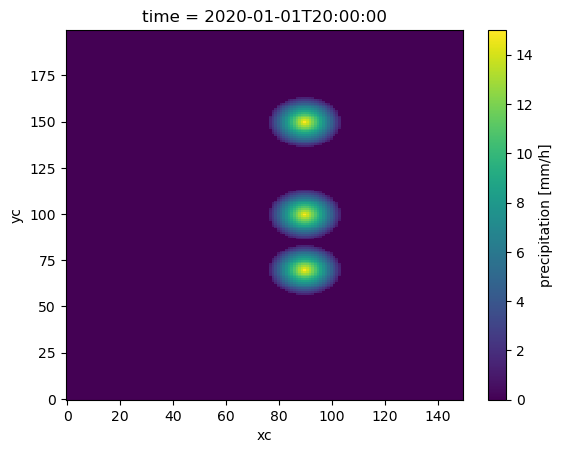

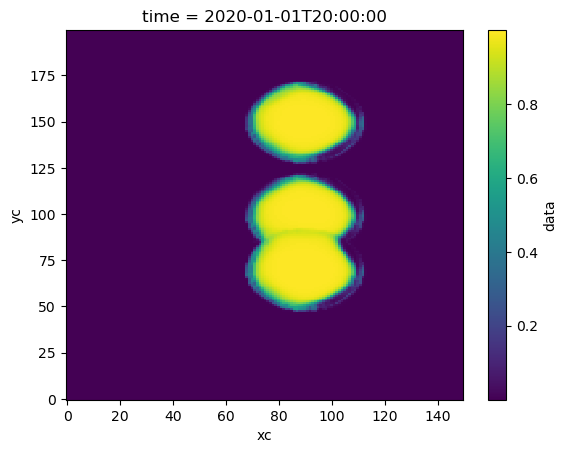

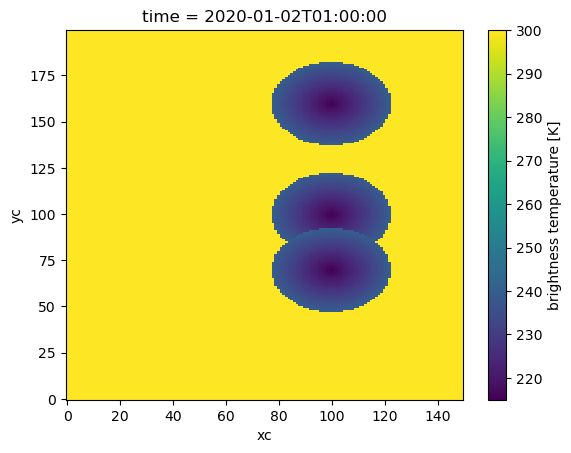

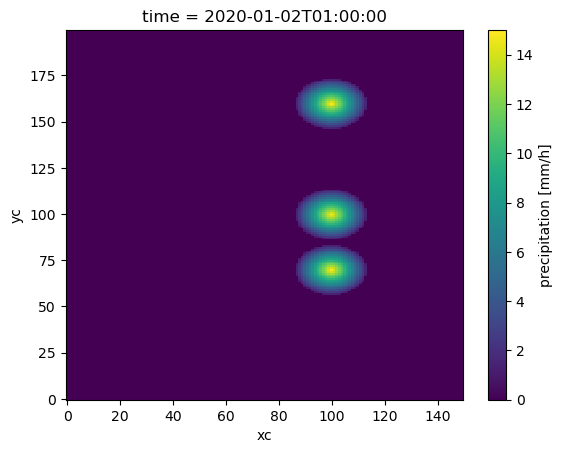

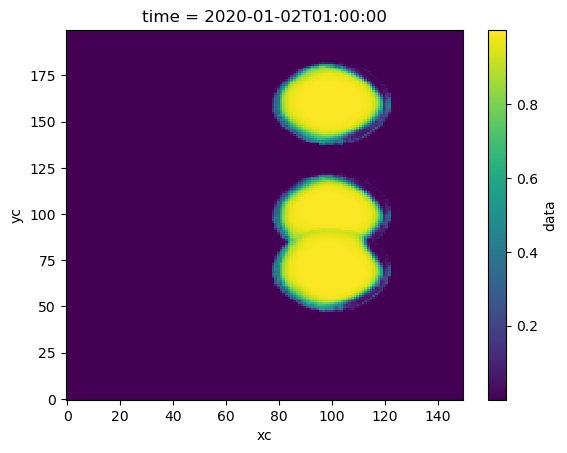

In [63]:
ds_orig = xr.open_dataset(mcsdir+file3)

ds = xr.open_mfdataset(
    '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/Idealized3_*.nc')

for i in np.arange(0, ds.time.shape[0], 5):
    ds_orig['Tb'].isel(time=i).plot(); plt.show()
    ds_orig['PR'].isel(time=i).plot(); plt.show()
    ds['data'][:,1,:,:].isel(time=i).plot(); plt.show()

ds.assign_attrs(
    author="Maria J. Molina",
    email="mjmolina@umd.edu",
    description="MCSs detected using deep learning model."
).to_netcdf(
    '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/MCS-test-2_3-merging_1-splitting_longer-isolation_DLmodel.nc'
)

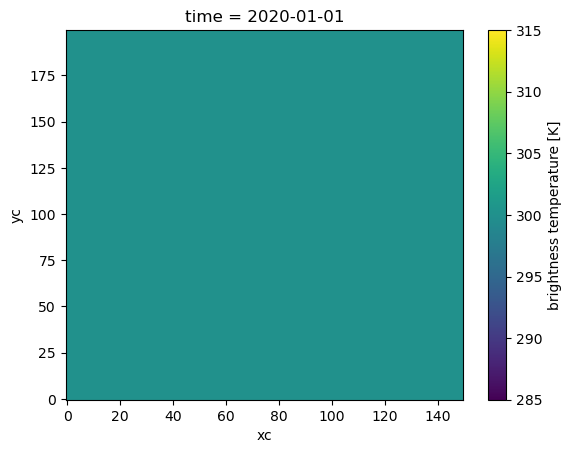

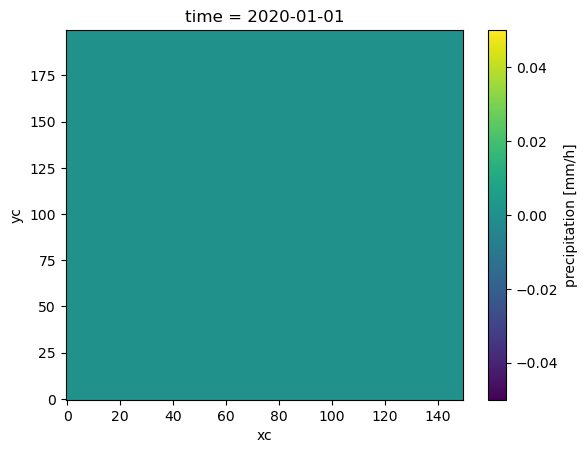

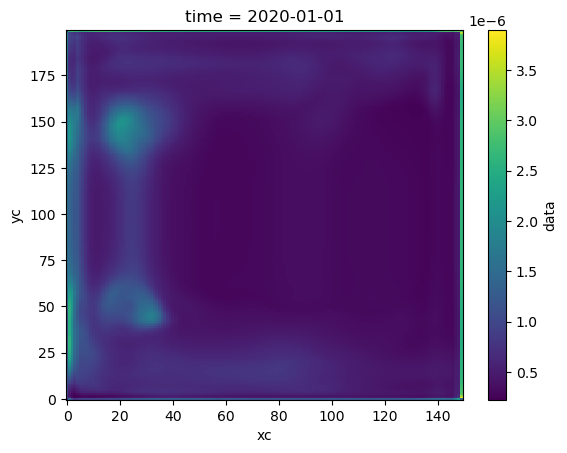

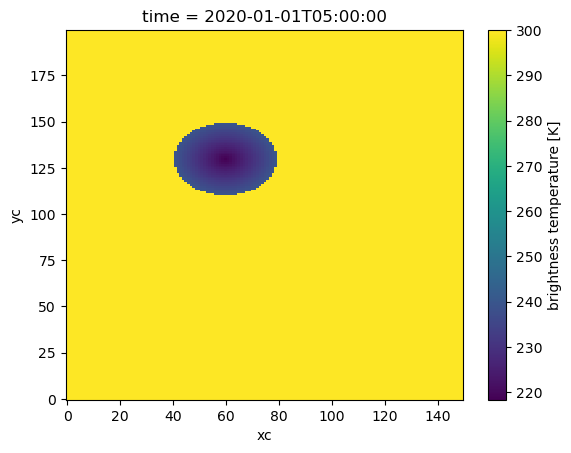

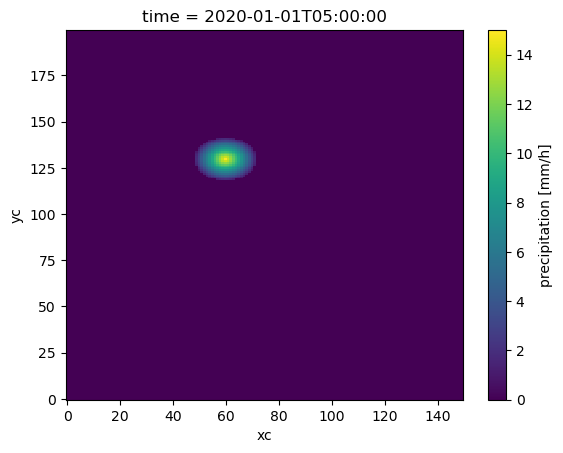

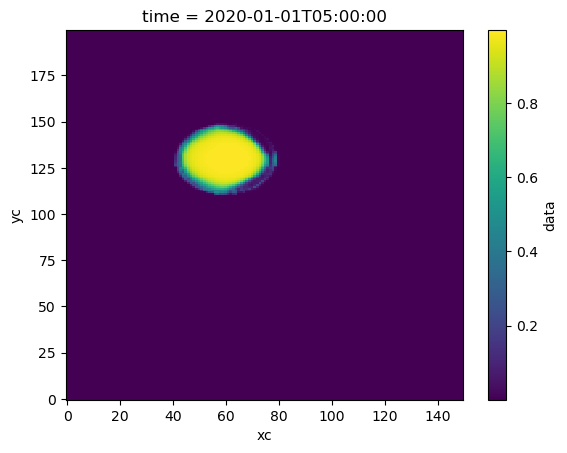

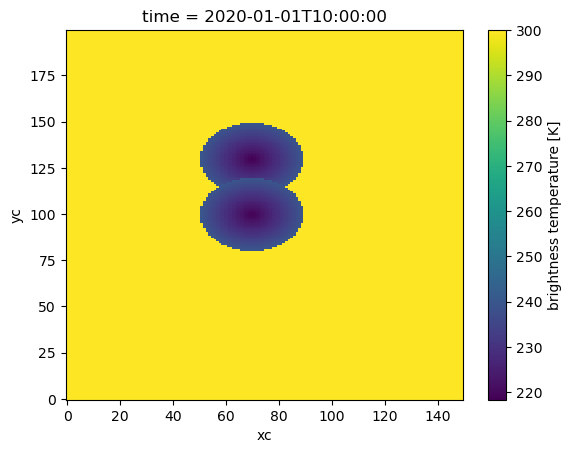

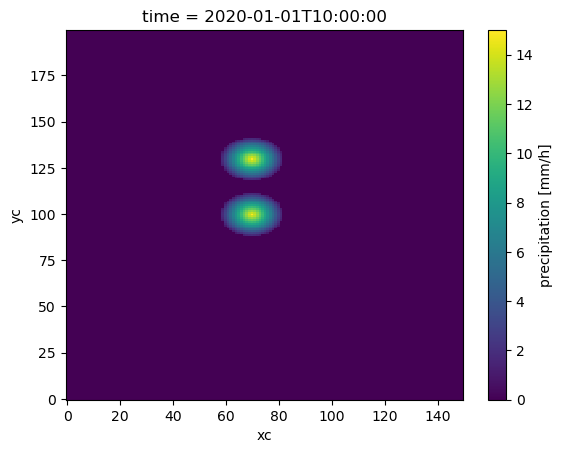

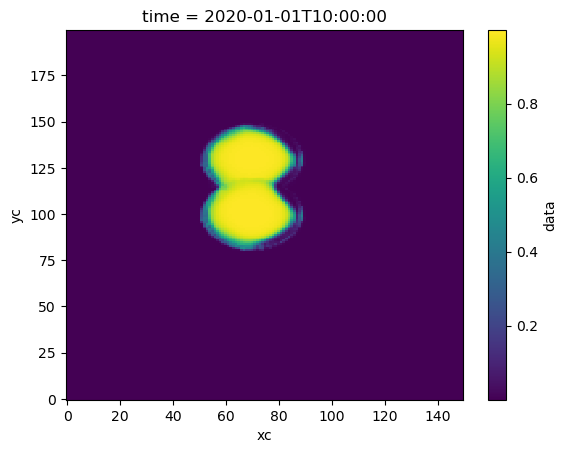

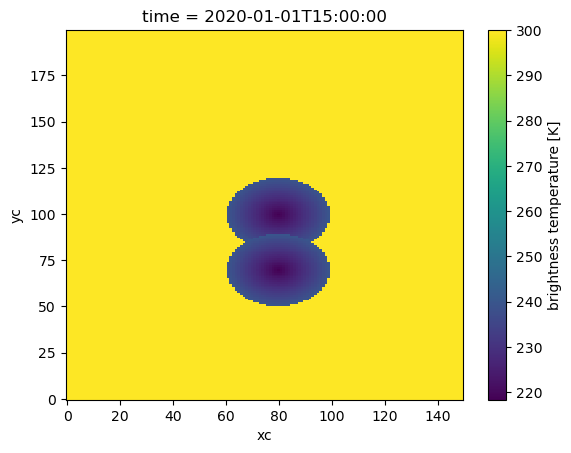

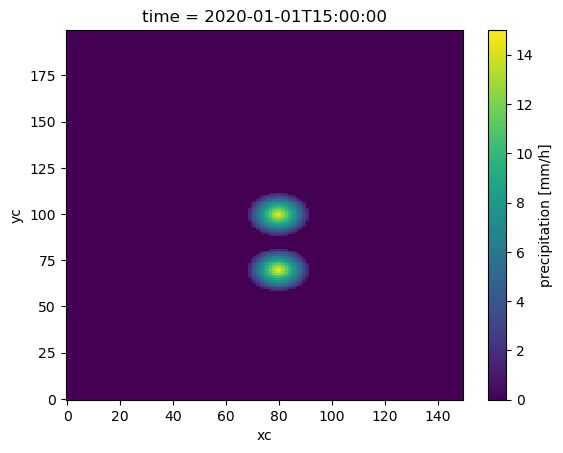

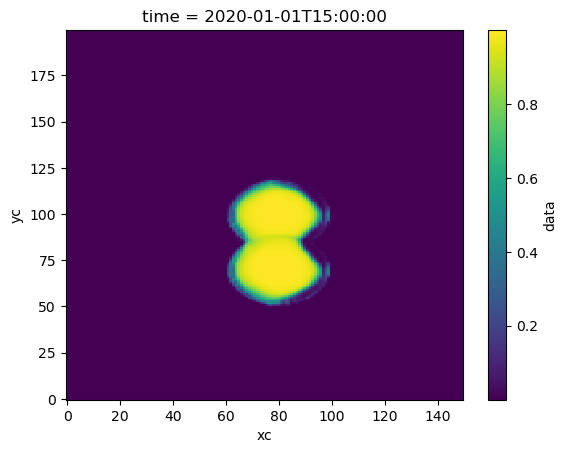

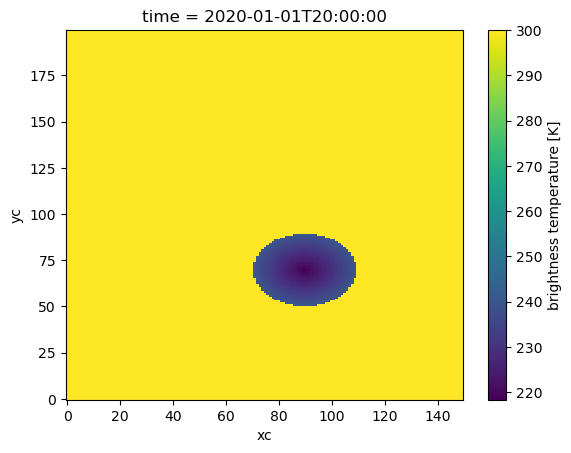

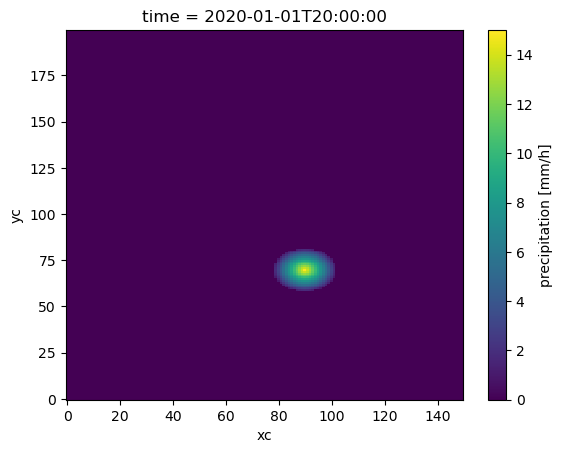

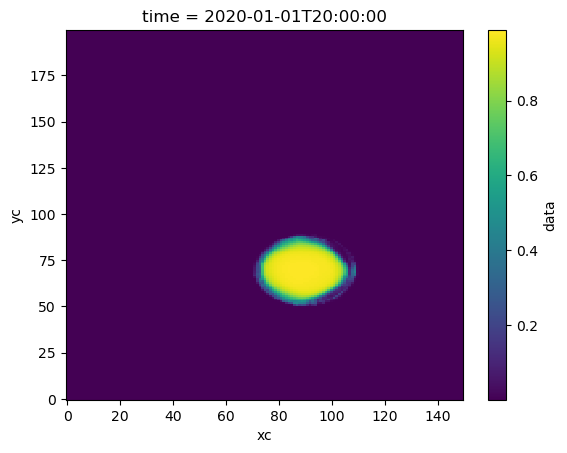

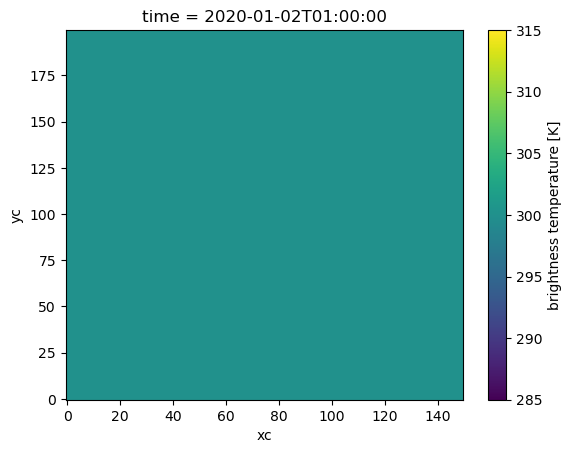

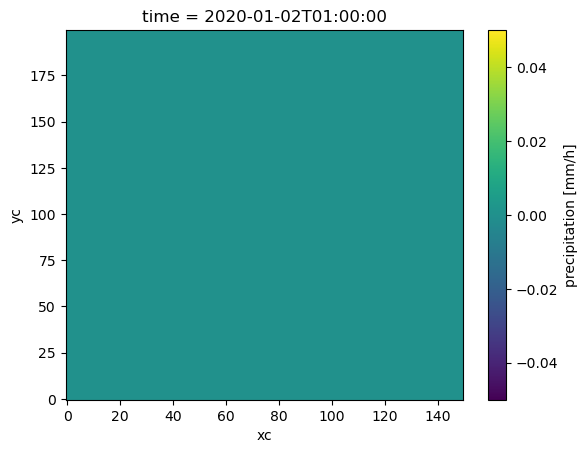

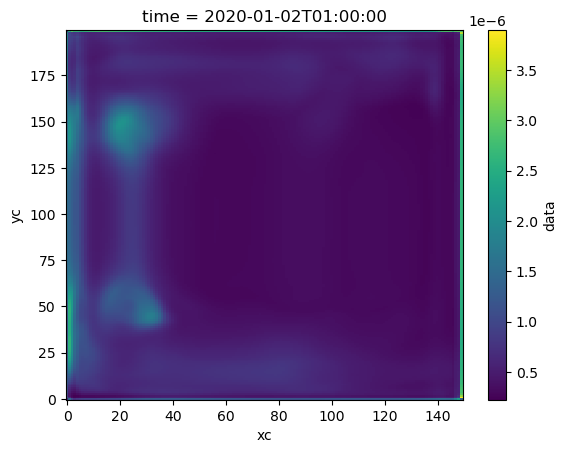

In [64]:
ds_orig = xr.open_dataset(mcsdir+file4)

ds = xr.open_mfdataset(
    '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/Idealized4_*.nc')

for i in np.arange(0, ds.time.shape[0], 5):
    ds_orig['Tb'].isel(time=i).plot(); plt.show()
    ds_orig['PR'].isel(time=i).plot(); plt.show()
    ds['data'][:,1,:,:].isel(time=i).plot(); plt.show()

ds.assign_attrs(
    author="Maria J. Molina",
    email="mjmolina@umd.edu",
    description="MCSs detected using deep learning model."
).to_netcdf(
    '/glade/derecho/scratch/molina/MCSMIP/mloutput/Idealized/MCS-test-4_asynchronous-development_DLmodel.nc'
)